# HOG(Histogram of Oriented Gradient)

In [19]:
from skimage.io import imread
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
import cv2

(150, 150, 3)


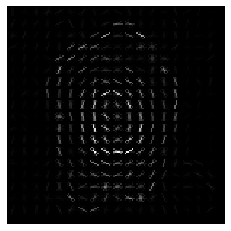

In [20]:
img = imread('flower.jpg')
plt.axis("off")
plt.imshow(img)
img=cv2.resize(img,(150,150))
print(img.shape)


fd, hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(2, 2), visualize=True, multichannel=True)
plt.axis("off")
plt.imshow(hog_image, cmap="gray")

In [21]:
print(fd)
print(fd.shape)

[0.34266544 0.01754169 0.         ... 0.04538115 0.07294682 0.07523776]
(10404,)


# ORB

ORB is a fusion of FAST keypoint detector and BRIEF descriptor with some added features to improve the performance. FAST is Features from Accelerated Segment Test used to detect features from the provided image. It also uses a pyramid to produce multiscale-features. Now it doesn’t compute the orientation and descriptors for the features, so this is where BRIEF comes in the role.

ORB uses BRIEF descriptors but as the BRIEF performs poorly with rotation. So what ORB does is to rotate the BRIEF according to the orientation of keypoints. Using the orientation of the patch, its rotation matrix is found and rotates the BRIEF to get the rotated version. ORB is an efficient alternative to SIFT or SURF algorithms used for feature extraction, in computation cost, matching performance, and mainly the patents. SIFT and SURF are patented and you are supposed to pay them for its use. But ORB is not patented.

Algorithm


Take the query image and convert it to grayscale.

Now Initialize the ORB detector and detect the keypoints in query image and scene.

Compute the descriptors belonging to both the images.

Match the keypoints using Brute Force Matcher.

Show the matched images.

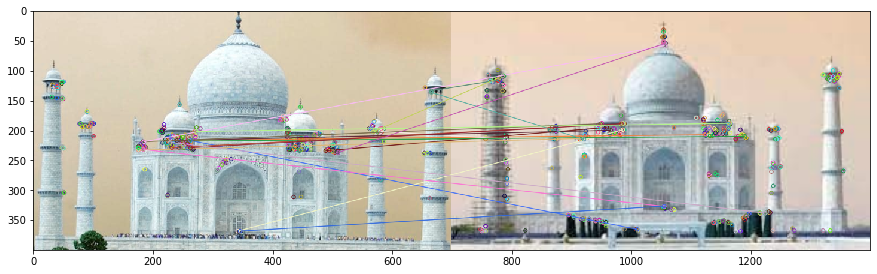

In [22]:
import numpy as np
import cv2
   
      
# Read the query image as query_img
# and traing image This query image
# is what you need to find in train image
# Save it in the same directory
# with the name image.jpg  
query_img = cv2.imread('taj1.jpg')
train_img = cv2.imread('taj2.jpg')

query_img=cv2.resize(query_img,(700,400))
train_img=cv2.resize(train_img,(700,400))
   
# Convert it to grayscale
query_img_bw = cv2.cvtColor(query_img,cv2.COLOR_BGR2GRAY)
train_img_bw = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)
   
# Initialize the ORB detector algorithm
orb = cv2.ORB_create()
   
# Now detect the keypoints and compute
# the descriptors for the query image
# and train image
queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw,None)
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw,None)
  
# Initialize the Matcher for matching
# the keypoints and then match the
# keypoints
matcher = cv2.BFMatcher()
matches = matcher.match(queryDescriptors,trainDescriptors)
   
# draw the matches to the final image
# containing both the images the drawMatches()
# function takes both images and keypoints
# and outputs the matched query image with
# its train image
final_img = cv2.drawMatches(query_img, queryKeypoints, 
train_img, trainKeypoints, matches[:20],None)

plt.figure(figsize=(15, 15))
plt.imshow(final_img)

# Other Useful Features 

Feature Maping 

1. SIFT

2. SURF


Texture Feature 

1. GLCM

2. LBP

3. Gabour FIlter

4. Haar

https://scikit-image.org/docs/dev/api/skimage.feature.html

# Human Part Detection

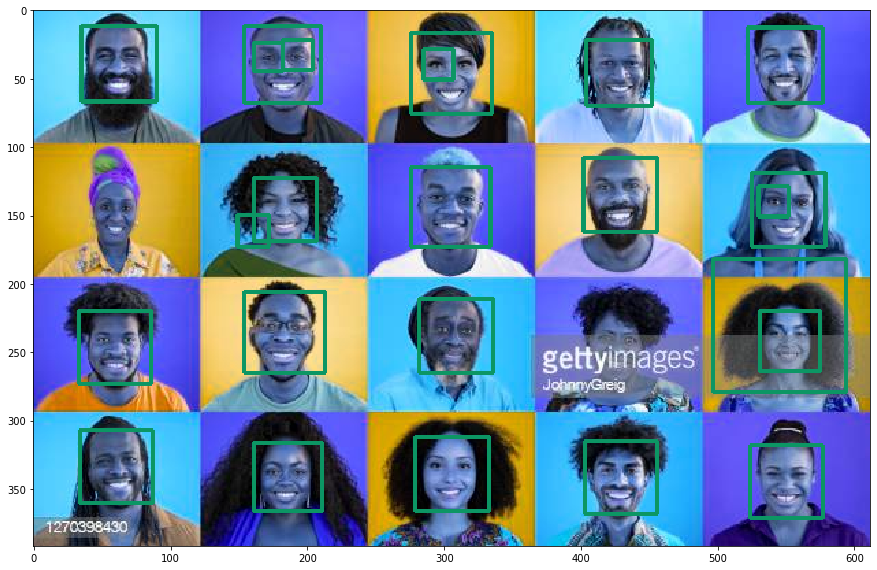

In [24]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('mface.jpg',cv2.IMREAD_COLOR)

face_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
low_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_lowerbody.xml')
eye_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_eye.xml')


gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY )

faces = face_cascade.detectMultiScale(gray, 1.1 , 4)
low = low_cascade.detectMultiScale(gray, 1.1 , 3)
eyes = eye_cascade.detectMultiScale(gray, 1.1 , 3)
    
for (x,y,w,h) in faces:
    cv2.rectangle(img, (x,y), (x+w, y+h), (12,150,100),2)
for (x,y,w,h) in low:
    cv2.rectangle(img, (x,y), (x+w, y+h), (12,150,100),2)
for (x,y,w,h) in eyes:
    cv2.rectangle(img, (x,y), (x+w, y+h), (12,150,100),2)
    
plt.figure(figsize=(15, 15))
plt.imshow(img)

In [26]:
faces

array([[531, 220,  44,  44],
       [279, 312,  54,  54],
       [161, 316,  50,  50],
       [522,  13,  55,  55],
       [ 35,  12,  55,  55],
       [402, 108,  54,  54],
       [524, 318,  53,  53],
       [525, 119,  54,  54],
       [ 33, 220,  53,  53],
       [161, 123,  46,  46],
       [403, 315,  53,  53],
       [282, 211,  54,  54],
       [154,  12,  56,  56],
       [154, 206,  59,  59],
       [276,  17,  59,  59],
       [ 34, 307,  53,  53],
       [276, 115,  58,  58],
       [404,  22,  48,  48]], dtype=int32)